# –¢e–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [1]:
! pip install spacy -q
! python -m spacy download ru_core_news_sm -q


2023-06-29 18:21:59.191520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 18:22:01.056270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 38.8 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


–ü–æ–¥–∫–ª—é—á–∞–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫–∏.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory data analysis

–£–∫–∞–∂–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É.

In [3]:
!gdown 1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj

Downloading...
From: https://drive.google.com/uc?id=1WbUGXxfXmWnBy93DdFQdT28s8eZfZSjj
To: /content/clean_posts.csv
100% 3.79M/3.79M [00:00<00:00, 151MB/s]


–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –≤ dataframe.

In [4]:
df = pd.read_csv('/content/clean_posts.csv')
df.head()

account_link       search_keywords  \
0  https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
1               https://www.linkedin.com/in/rauventa       senior frontend   
2       https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3  https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   

                name                                              title  \
0  Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
1     Ilya Moiseenko  LOOKING FOR "Senior/Lead Frontend (React) Deve...   
2   Denis Kuchkildin                           Data Analyst at X5 Group   
3       Ian Silantev  MSc Data Science in University of East London ...   
4     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   

    works_at                                              intro  experience  \
0        IBS  –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
1  Centicore  Ilya, React Developer from Moscow.Ilya, React ...         8.0   
2   X5 Group  I have a strong engineering background and mor...         6.0   
3  Neurospot  Absolutely in love with Data Science, AI and M...         2.0   
4        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   

                                place  posts_cnt  \
0  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          0   
1              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
2              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
3                     –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è          0   
4                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   

                                           post_text  reaction_cnt  \
0                                                NaN           NaN   
1  –Ø —Ç–æ–ª—å–∫–æ —á—Ç–æ –ø–æ–ª—É—á–∏–ª(–∞) –∑–Ω–∞—á–æ–∫ –∑–∞ –Ω–∞–≤—ã–∫ ¬´JavaS...           1.0   
2  Hi everyone - I am looking for a new role and ...           NaN   
3                                                NaN           NaN   
4  Finding a job for trainees and juniors is a ch...           1.0   

   comments_cnt  repost_cnt  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏.

In [5]:
df.shape

(2081, 13)

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∏–º–µ–Ω —Å—Å—ã–ª–æ–∫ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

In [6]:
df.account_link.nunique()

800

787 —Å—Å—ã–ª–æ–∫ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã.

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø–æ—Å—Ç—ã –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º.

In [7]:
df = df[df.post_text.astype('str').map(lambda x: x.isascii())==True]

In [8]:
df.post_text.value_counts()

Hi everyone - I am looking for a new role and would appreciate your support. Thank you in advance for any connections, advice, or opportunities you can offer. #OpenToWork                                                                                         25
View my verified achievement from Amazon Web Services (AWS).                                                                                                                                                                                                        4
Finding a job for trainees and juniors is a challenge every time. Especially now. So let's support them                                                                                                                                                             2
I just earned a skill badge for Linux! Who's next? See how you do on a #LinkedInSkillAssessment.                                                                                                                      

In [9]:
df.shape

(1372, 13)

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —á–∏—Å–ª—è–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.**

In [10]:
df.describe()

experience    posts_cnt  reaction_cnt  comments_cnt  repost_cnt
count  1367.000000  1372.000000    383.000000    112.000000  107.000000
mean     19.768105    56.740525      3.527415      3.017857    4.186916
std     100.433021   111.188689      2.574270      2.521912    2.678111
min       0.000000     0.000000      1.000000      1.000000    1.000000
25%       5.000000     0.000000      1.000000      1.000000    2.000000
50%       9.000000     1.000000      3.000000      2.000000    3.000000
75%      11.000000    22.000000      5.000000      4.000000    6.500000
max    1432.000000   308.000000      9.000000      9.000000    9.000000

# Experience - –æ–ø—ã—Ç.

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –≤—ã–±—Ä–æ—Å—ã –ø–æ –æ–ø—ã—Ç—É. –ù—É –Ω–∏–∫–∞–∫ –±–æ–ª—å—à–µ 100 –ª–µ—Ç —É –Ω–∞—Å –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –¢–µ–º –±–æ–ª–µ–µ 1000 –ª–µ—Ç. –î–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –º—ã –Ω–µ –æ—Ü–µ–Ω–∏–≤–∞–µ–º. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö —Å—Ç—Ä–æ–∫.

In [11]:
len(df[df.experience>100])

18

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –ø–æ—Å—Ç—ã —É –ª—é–¥–µ–π —Å–æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 100 –ª–µ—Ç.

In [12]:
df[df.experience>100].posts_cnt.value_counts(dropna=False)

0    14
8     2
2     2
Name: posts_cnt, dtype: int64

–ü–æ—Å—Ç—ã –µ—Å—Ç—å, –Ω–µ –±—É–¥–µ–º –∏—Ö —É–¥–∞–ª—è—Ç—å. –ù–æ –ø–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–µ–∑ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

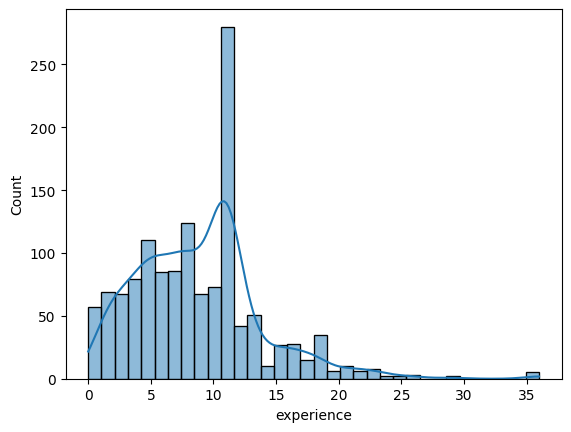

In [13]:
sns.histplot(df.query('experience<100')['experience'], kde=True)
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ, –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –æ–ø—ã—Ç–æ–º 10 –ª–µ—Ç. –†–µ–∑–∫–∏–π –ø–∏–∫ —É 12. –ò –µ—â–µ –±–æ–ª–µ–µ —Ä–µ–∑–∫–∏–π —Å–ø–∞–¥. –õ—é–¥–µ–π —Å –æ–ø—ã—Ç–æ–º –±–æ–ª–µ–µ 30 –ª–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç.

# posts_cnt - –∫–æ–ª-–≤–æ –ø–æ—Å—Ç–æ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ –ø–æ –∫–æ–ª-–≤—É –ø–æ—Å—Ç–æ–≤.

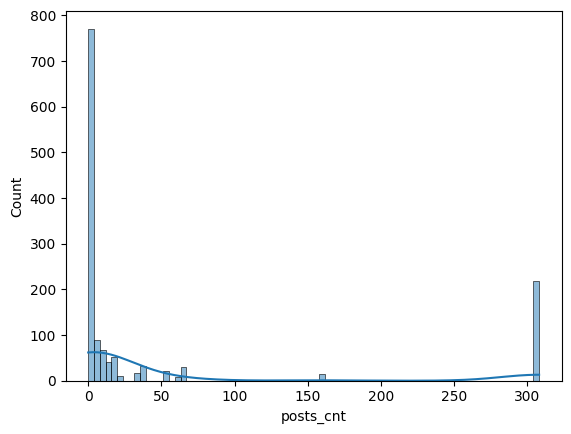

In [14]:

sns.histplot(df.posts_cnt, kde=True)
plt.show()

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–æ—Ñ–∏–ª–µ–π –Ω–µ –∏–º–µ—é—Ç –ø–æ—Å—Ç–æ–≤. –ï—Å—Ç—å –µ–¥–∏–Ω–∏—á–Ω—ã–µ –ø–∏–∫–∏ —É 150 –∏ 300. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å —Ç–∞–∫–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [15]:
df[df.posts_cnt>100]['name'].nunique()

2

2 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è —Å —Ç–∞–∫–∏–º –∫–æ–ª-–≤–æ–º –ø–æ—Å—Ç–æ–≤.

# reaction_cnt - –∫–æ–ª-–≤–æ —Ä–µ–∞–∫—Ü–∏–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

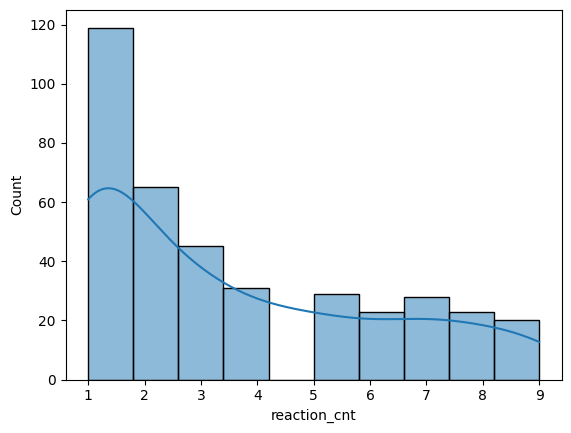

In [16]:
sns.histplot(df.reaction_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å –≥—Ä–∞—Ñ–∏–∫ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂ –Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –ï—Å—Ç—å –∏ –ø—Ä–æ–≤–∞–ª—ã, –∫–æ–Ω–µ—á–Ω–æ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π.

In [17]:
df.reaction_cnt.value_counts(dropna=False)

NaN    989
1.0    119
2.0     65
3.0     45
4.0     31
5.0     29
7.0     28
8.0     23
6.0     23
9.0     20
Name: reaction_cnt, dtype: int64

–ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –æ–∫–æ–ª–æ –ø–æ–ª–æ–≤–∏–Ω—ã –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–∞–∫—Ü–∏–π.

# comments_cnt - –∫–æ–ª-–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ reaction_cnt.

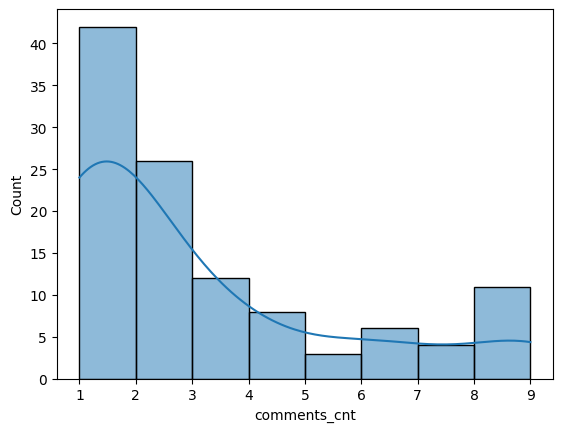

In [18]:
sns.histplot(df.comments_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å —É –Ω–∞—Å –ø–∏–∫ —É 1, –¥–∞–ª–µ–µ —Å–ø–∞–¥. –£ –±–æ–ª—å—à–∏—Å—Ç–≤–∞, –∫–æ–Ω–µ—á–Ω–æ 0 –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –∏—Ö.

In [19]:
df.comments_cnt.value_counts(dropna=False)

NaN    1260
1.0      42
2.0      26
3.0      12
9.0       9
4.0       8
6.0       6
7.0       4
5.0       3
8.0       2
Name: comments_cnt, dtype: int64

3/4 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤.

# repost_cnt - –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤.

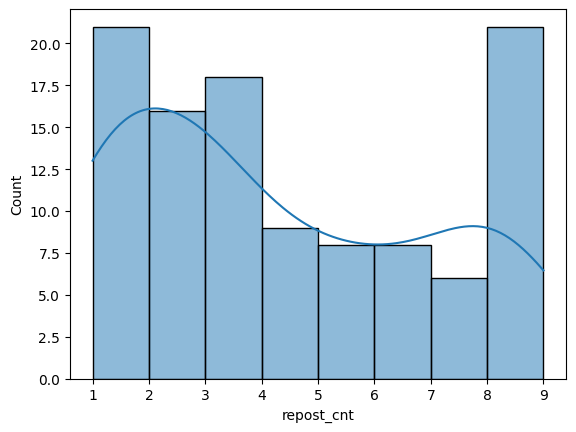

In [20]:

sns.histplot(df.repost_cnt, kde=True)
plt.show()

–ó–¥–µ—Å—å —É –Ω–∞—Å –ø–∏–∫ —É 1, –¥–∞–ª–µ–µ —Å–ø–∞–¥. –£ –±–æ–ª—å—à–∏—Å—Ç–≤–∞, –∫–æ–Ω–µ—á–Ω–æ 0 –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –∏—Ö.

In [21]:
df.repost_cnt.value_counts(dropna=False)

NaN    1265
1.0      21
3.0      18
2.0      16
8.0      14
4.0       9
5.0       8
6.0       8
9.0       7
7.0       6
Name: repost_cnt, dtype: int64

3/4 –ø–æ—Å—Ç–æ–≤ –±–µ–∑ —Ä–µ–ø–æ—Å—Ç–æ–≤.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–æ—Å—Ç–æ–≤ –∏ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–∏. –ò–Ω–µ—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –æ–Ω–∏ –∑–∞–≤–∏—Å—è—Ç –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞.

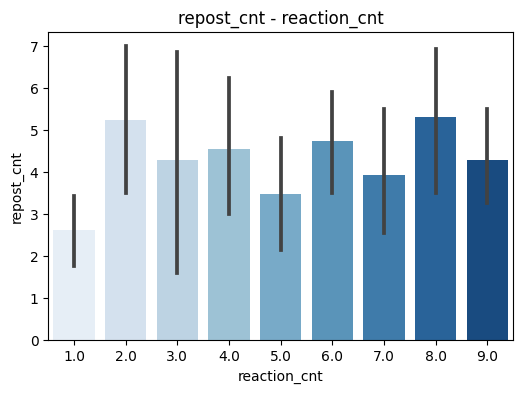

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

–í—Å–µ —Ç–∞–∫–∂–µ –ª–æ–≥–∏—á–Ω–æ, —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –∫–æ–ª-–≤–∞ —Ä–µ–∞–∫—Ü–∏–π –Ω–∞ –ø–æ—Å—Ç, —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –∫–æ–ª-–≤–æ —Ç–µ—Ö,–∫ —Ç–æ —Ä–µ–ø–æ—Å—Ç–∏—Ç.

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤—è–∑–∞–Ω–æ –ª–∏ –∫–æ–ª-–≤–æ —Ä–µ–ø–æ—Å—Ç–æ–≤ —Å —Ä–µ–∞–∫—Ü–∏—è–º–∏.

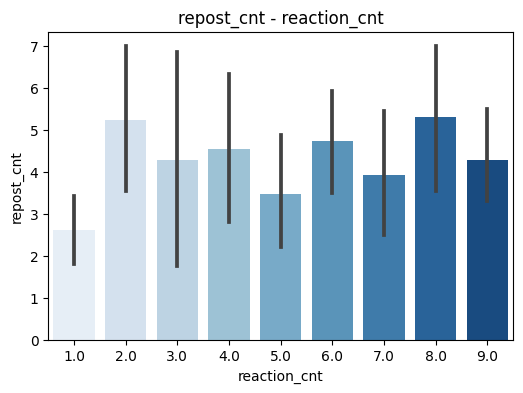

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='reaction_cnt', y='repost_cnt', data = df, palette='Blues')
plt.title('repost_cnt - reaction_cnt')
plt.show()

In [24]:
df.head()

account_link       search_keywords  \
0  https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
2       https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3  https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   
5         https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   

                name                                              title  \
0  Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
2   Denis Kuchkildin                           Data Analyst at X5 Group   
3       Ian Silantev  MSc Data Science in University of East London ...   
4     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   
5     Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   

    works_at                                              intro  experience  \
0        IBS  –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
2   X5 Group  I have a strong engineering background and mor...         6.0   
3  Neurospot  Absolutely in love with Data Science, AI and M...         2.0   
4        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
5        NaN  Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   

                                place  posts_cnt  \
0  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          0   
2              –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
3                     –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è          0   
4                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   
5                 –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   

                                           post_text  reaction_cnt  \
0                                                NaN           NaN   
2  Hi everyone - I am looking for a new role and ...           NaN   
3                                                NaN           NaN   
4  Finding a job for trainees and juniors is a ch...           1.0   
5  Hi everyone!I am looking for a job as Junior U...           1.0   

   comments_cnt  repost_cnt  
0           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
5           4.0         3.0

–ü—Ä–æ–≤–µ—Ä–∏–º, –µ—Å—Ç—å –ª–∏ –≤ –¥–∞–Ω–Ω—ã—Ö —Ä–µ–∫—Ä—É—Ç–µ—Ä—ã.

In [25]:
df[df['title'].str.contains('Recruit')==True]

account_link       search_keywords  \
27    https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...         lead frontend   
40    https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...  middle test engineer   
639   https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...         lead frontend   
668   https://www.linkedin.com/in/ACoAAAfSmP0BPGYrNv...         lead frontend   
722   https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...         lead frontend   
723   https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...  middle test engineer   
740   https://www.linkedin.com/in/ACoAAEAtkocBP-DgeP...              frontend   
818   https://www.linkedin.com/in/ACoAACYxveYBfh1wa2...     lead data analyst   
823   https://www.linkedin.com/in/ACoAAA5tS24BDNRFJX...     lead data analyst   
846   https://www.linkedin.com/in/ACoAAC1rrUUBa5JUg0...     lead data analyst   
899   https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...     lead data analyst   
901   https://www.linkedin.com/in/ACoAACkaRegBhS5pfi...     lead data analyst   
909   https://www.linkedin.com/in/ACoAACNYFjcBVCG3y_...     lead data analyst   
913   https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...     lead data analyst   
968   https://www.linkedin.com/in/ACoAAA2hJXUBIL5ff_...     lead data analyst   
971   https://www.linkedin.com/in/ACoAAAtUQegBHrdptC...     lead data analyst   
1015  https://www.linkedin.com/in/ACoAABo_W58BPV1qgl...     lead data analyst   
1045  https://www.linkedin.com/in/ACoAACNYFjcBVCG3y_...    lead web developer   
1065  https://www.linkedin.com/in/ACoAABo_W58BPV1qgl...    lead web developer   
1066  https://www.linkedin.com/in/ACoAACRzkCIB9dC740...    lead web developer   
1102  https://www.linkedin.com/in/ACoAAC_ztqMBiwmeUF...    lead web developer   
1113  https://www.linkedin.com/in/ACoAAA2hJXUBIL5ff_...    lead web developer   
1121  https://www.linkedin.com/in/ACoAAAtUQegBHrdptC...    lead web developer   
1128  https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...    lead web developer   
1161  https://www.linkedin.com/in/ACoAACoWT6EBuouS6J...    lead web developer   
1170  https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...    lead web developer   
1234  https://www.linkedin.com/in/ACoAAA5tS24BDNRFJX...    lead web developer   
1246  https://www.linkedin.com/in/ACoAACX8UU8Bf0tpWo...    lead web developer   
1299  https://www.linkedin.com/in/ACoAAA5tS24BDNRFJX...    lead test engineer   
1312  https://www.linkedin.com/in/ACoAACX8UU8Bf0tpWo...    lead test engineer   
1347  https://www.linkedin.com/in/ACoAAAqhWrQB8mmVQS...    lead test engineer   
1387  https://www.linkedin.com/in/ACoAABMKv8EBpp_zbd...    lead test engineer   
1415  https://www.linkedin.com/in/ACoAAA2hJXUBIL5ff_...    lead test engineer   
1435  https://www.linkedin.com/in/ACoAABkz7KkBFOaZUx...    lead test engineer   
1437  https://www.linkedin.com/in/ACoAAAtUQegBHrdptC...    lead test engineer   
1465  https://www.linkedin.com/in/ACoAACmcSgkBtHUGiR...    lead test engineer   
1504  https://www.linkedin.com/in/ACoAABMKv8EBpp_zbd...           lead devops   
1511  https://www.linkedin.com/in/ACoAABo_W58BPV1qgl...           lead devops   
1514  https://www.linkedin.com/in/ACoAAA5tS24BDNRFJX...           lead devops   
1748  https://www.linkedin.com/in/ACoAACRzkCIB9dC740...    senior ML engineer   
1771  https://www.linkedin.com/in/ACoAAC_ztqMBiwmeUF...    senior ML engineer   
1820  https://www.linkedin.com/in/ACoAACX8UU8Bf0tpWo...    senior ML engineer   
2054  https://www.linkedin.com/in/ACoAAA5tS24BDNRFJX...        senior backend   
2057  https://www.linkedin.com/in/ACoAAC_ztqMBiwmeUF...        senior backend   
2062  https://www.linkedin.com/in/ACoAACSbglsB1GwUeQ...        senior backend   

                       name  \
27         Kristina Korobko   
40      Anastasia Usoltseva   
639     Anastasia Usoltseva   
668          Lydia Saranina   
722        Kristina Korobko   
723     Anastasia Usoltseva   
740            Aisa Umakova   
818       Angelica Krytsina   
823      Oksana Sovetnikova   
846   

–ï—Å—Ç—å —Ç–∞–∫–∏–µ. –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤.

In [26]:
len(df[df['title'].str.contains('Recruiter')==True])

34

–ü–æ—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç —Ä–µ–∫—Ä—É—Ç–µ—Ä–æ–≤.

In [27]:
df = df[df['title'].str.contains('Recruiter')==False]

In [28]:
df.shape

(1338, 13)

In [29]:
df.account_link.nunique()

695

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –Ω–∞—à–∏—Ö —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤.

In [30]:
df.title.unique()

array(['Senior Web Developer - IBS InfinitySoft',
       'Data Analyst at X5 Group',
       'MSc Data Science in University of East London | Data Scientist | Machine Learning Engineer | Deep Learning Engineer',
       'Senior Test Automation Engineer at GlobalLogic',
       'Senior QA Engineer - Deutsche Bank', 'Data Engineer',
       'Javascript Software Engineer at EPAM Systems',
       'Senior Frontend Developer', 'Senior Web Developer ‚Äì Devart',
       'Team Lead at Yandex', 'QA Engineer', 'Frontend developer',
       'QA Engineer - Kupibilet.ru',
       'ML Engineer | HSE University BSc Student',
       'ML Engineer @ SberDevices',
       'Team Lead | Data Analyst | Data Engineer | ML Engineer',
       'Lead QA Engineer',
       'Head of Mobile / Engineering Manager / Mobile Community Lead',
       'Blockchain and Backend developer at RedSteep',
       'Frontend Developer', 'IT-recruiter',
       'Frontend Developer | JavaScript | React | Redux  | TypeScript',
       'Frontend D

In [31]:
mistakes=['–ò—â—É —Å—Ä–æ—á–Ω–æ: –ì–ª–∞–≤–Ω–æ–≥–æ –≥–µ–æ–ª–æ–≥–∞ (–∏–∑—ã—Å–∫–∞–Ω–∏—è)! –õ–æ–∫–∞—Ü–∏—è -–ú–æ—Å–∫–≤–∞ –ª–∏–±–æ –¢–æ–ª—å—è—Ç—Ç–∏', '17000+ | –ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –ø–æ–º–æ—â—å –≤ –ø–æ–∏—Å–∫–µ —Ä–∞–±–æ—Ç—ã | im-konsalting.ru  | mail@im-konsalting.ru | WhatsApp/Telegram: 79643223069',
            '–†—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è –≤ –∫—Ä—É–ø–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏—è—Ö –Ω–∞ B2C —Ä—ã–Ω–∫–µ | 11 000+','–°—Ç—Ä–æ—é –∫—Ä—É—Ç—ã–µ –æ—Ç–¥–µ–ª—ã –ø—Ä–æ–¥–∞–∂. –û–±—É—á–∞—é –≤ —Ñ–æ—Ä–º–∞—Ç–µ ¬´–†–µ–∞–ª–∏—Ç–∏¬ª. –Ø - –í–ª–∞–¥–∏–º–∏—Ä –Ø–∫—É–±–∞',
            '–°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –ø–æ –Ω–∞–π–º—É –ø–µ—Ä—Å–æ–Ω–∞–ª–∞ ‚Äì V Kontakte LLC',]
df=df.query('title not in @mistakes')

–ò—Ç–æ–≥–æ  –Ω–∞—à –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–π —Ñ–∞–π–ª:

In [32]:
df.shape

(1330, 13)

–≠—Ç–æ 1330 —Å—Ç—Ä–æ–∫.

In [33]:
df.account_link.nunique()

690

690 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

In [34]:
df

account_link       search_keywords  \
0     https://www.linkedin.com/in/varvara-kulmeteva-...  senior web developer   
2          https://www.linkedin.com/in/denis-kuchkildin   middle data analyst   
3     https://www.linkedin.com/in/ACoAAC4yJzEB4TjXkJ...    senior ML engineer   
4            https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   
5            https://www.linkedin.com/in/oleg-malyshkin  senior test engineer   
...                                                 ...                   ...   
2075  https://www.linkedin.com/in/nikolay-kozlov-073...        senior backend   
2077  https://www.linkedin.com/in/%D0%B0%D0%BD%D0%B4...        senior backend   
2078  https://www.linkedin.com/in/%D1%8E%D1%80%D0%B8...        senior backend   
2079  https://www.linkedin.com/in/%D1%8E%D1%80%D0%B8...        senior backend   
2080  https://www.linkedin.com/in/ACoAAABL66UBL_E8vs...        senior backend   

                   name                                              title  \
0     Varvara Kulmeteva            Senior Web Developer - IBS InfinitySoft   
2      Denis Kuchkildin                           Data Analyst at X5 Group   
3          Ian Silantev  MSc Data Science in University of East London ...   
4        Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   
5        Oleg Malyshkin     Senior Test Automation Engineer at GlobalLogic   
...                 ...                                                ...   
2075     NIkolay Kozlov             Senior software engineer (Java/Kotlin)   
2077       –ê–Ω–¥—Ä–µ–π –ü—É—à–∏–Ω  Senior Backend developer - –õ–∏–≥–∞ –¶–∏—Ñ—Ä–æ–≤–æ–π –≠–∫–æ–Ω–æ...   
2078   –Æ—Ä–∏–π –ß–µ—Ä–Ω–æ–≥–æ—Ä—Ü–µ–≤           Senior backend developer - Delivery Club   
2079   –Æ—Ä–∏–π –ß–µ—Ä–Ω–æ–≥–æ—Ä—Ü–µ–≤           Senior backend developer - Delivery Club   
2080     Vsevolod Rymar                                     Head of Design   

                              works_at  \
0                                  IBS   
2                             X5 Group   
3                            Neurospot   
4                                  NaN   
5                                  NaN   
...                                ...   
2075  The Software Development Company   
2077           –õ–∏–≥–∞ –¶–∏—Ñ—Ä–æ–≤–æ–π –≠–∫–æ–Ω–æ–º–∏–∫–∏   
2078                     Delivery Club   
2079                     Delivery Club   
2080                   Moscow Exchange   

                                                  intro  experience  \
0     –ù–∞–≤—ã–∫–∏: ReactJS ¬∑ JavaScript ¬∑ HTML ¬∑ CSS–ù–∞–≤—ã–∫...        10.0   
2     I have a strong engineering background and mor...         6.0   
3     Absolutely in love with Data Science, AI and M...         2.0   
4     Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
5     Hi everyone, I am Oleg Malyshkin - Senior Test...         4.0   
...                                                 ...         ...   
2075  Senior software engineer with strong skills in...         7.0   
2077  –†–∞–∑—Ä–∞–±–æ—Ç–∫–∞ —Å–∏—Å—Ç–µ–º—ã –∏–º–∏—Ç–∞—Ü–∏–∏ —Å–∏–≥–Ω–∞–ª–æ–≤ –ª–µ—Ç–∞—Ç–µ–ª—å–Ω...         8.0   
2078  –°—Ç–µ–∫: PHP, GoLang, Javascript + jQuery, CSS, M...        12.0   
2079  –°—Ç–µ–∫: PHP, GoLang, Javascript + jQuery, CSS, M...        12.0   
2080  My specialization and expertise are in Softwar...         6.0   

                                    place  posts_cnt  \
0      –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è          0   
2                  –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          1   
3                         –¢–±–∏–ª–∏—Å–∏, –ì—Ä—É–∑–∏—è          0   
4                     –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   
5                     –ö–∏–µ–≤, –ö–∏–µ–≤, –£–∫—Ä–∞–∏–Ω–∞          9   
...                                   ...        ...   
2075               –ú–æ—Å–∫–≤–∞, –ú–æ—Å–∫–≤–∞, –†–æ—Å—Å–∏—è          0   
2077  –ö–æ—Ä–æ–ª—ë–≤, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –†–æ—Å—Å–∏—è     

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

–ü—Ä–æ–≤–µ–¥–µ–º –æ—á–∏—Å—Ç–∫—É —Ç–µ–∫—Å—Ç–∞, –∞ —Ç–∞–∫–∂–µ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –∏ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é.

In [35]:
model = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

–°–∫–ª–∞–¥—ã–≤–∞–µ–º –≤—Å–µ –ø–æ—Å—Ç—ã –≤ –æ–¥–∏–Ω —Å–ø–∏—Å–æ–∫

In [36]:
df.post_text.isna().sum()

814

In [37]:
df["post_text"] = df["post_text"].dropna()

In [38]:
df["post_text"]  = df["post_text"] .astype('str')

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª-–≤–æ —Å–∏–º–≤–æ–ª–æ–≤ –≤ –ø–æ—Å—Ç–∞—Ö.

In [39]:
df["symbols"] = [len(x) for x in df['post_text']]

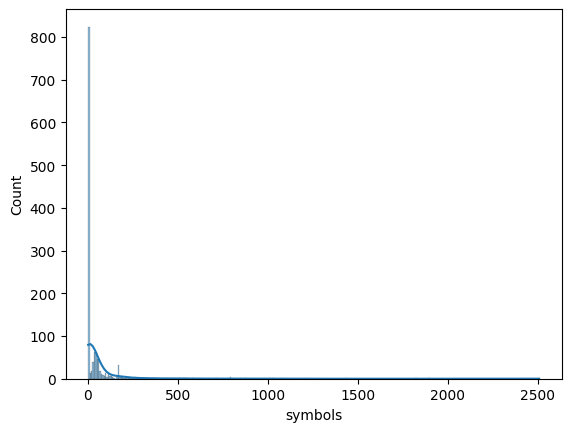

In [40]:
sns.histplot(df.symbols, kde=True)
plt.show()

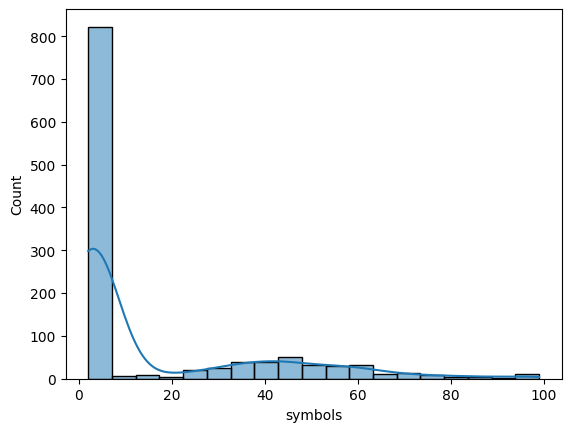

In [61]:
sns.histplot(df[df.symbols<=100].symbols, kde=True)
plt.show()

In [43]:
texts = df["post_text"].tolist()

–£–¥–∞–ª–∏–º –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Ü–∏—Ñ—Ä—ã –∏ —Å–ª–æ–≤–∞, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —Ü–∏—Ñ—Ä—ã. –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ª–∞—Ç–∏–Ω–∏—Ü—É.


In [44]:
res = []
for doc in model.pipe(texts, disable=["tagger", "parser"]):
    res.append([token.lemma_ for token in doc])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [45]:
with open("lemmas.json", "w") as fid:
    json.dump({"lemmas": res}, fid)

In [46]:
word_pattern = re.compile("^[a-zA-Z]*$")
def remove_symbols(doc):
    return [token for token in doc if word_pattern.match(token)]
texts = list(map(remove_symbols, res))
corpus = list(map(remove_symbols, res))

In [47]:
", ".join(corpus[np.random.randint(len(corpus))])

'nan'

## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤

–ß—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ–ª—É—á–∞–µ–º–æ–π –º–∞—Ç—Ä–∏—Ü—ã, –¥–æ–±–∞–≤–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤.

In [48]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
tfidf = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.9)

–¢.–µ. TfIdfVectorizer –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π, –ø–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å —Å–ø–∏—Å–∫–∏ —Å–ª–æ–≤, —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö –∫–æ—Ä–ø—É—Å, –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è.

In [50]:
docs = [" ".join(tokens) for tokens in corpus]
docs[:3]

['nan',
 'hi everyone i am looking for a new role and would appreciate your support thank you in advance for any connections advice or opportunities you can offer opentowork',
 'nan']

In [51]:
docs = list(filter(None, docs))

In [52]:
x = tfidf.fit_transform(docs)

In [53]:
x.shape

(1326, 90)

–¢–µ–ø–µ—Ä—å —Å–æ—Å—Ç–∞–≤–∏–º —Å–ª–æ–≤–∞—Ä—å {id_—Ç–æ–∫–µ–Ω–∞: —Ç–æ–∫–µ–Ω} - –æ–Ω –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –Ω–∞–º –ø–æ–∑–¥–Ω–µ–µ.

In [54]:
id2word = {i: token for i, token in enumerate(tfidf.get_feature_names_out())}

## LDA

–¢–µ–ø–µ—Ä—å –º–æ–∂–µ–º –∑–∞–ø—É—Å—Ç–∏—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º LDA. –ó–∞–¥–∞–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º —Ä–∞–≤–Ω–æ–µ 5.

In [65]:
n_topics = 3

In [66]:
lda = LatentDirichletAllocation(n_components=n_topics, random_state=31)

In [67]:
topics = lda.fit_transform(x)

In [68]:
topics.shape

(1326, 3)

### –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

In [69]:
for i in range(n_topics):
    c = lda.components_[i, :]
    topic_tokens = [id2word.get(token_id) for token_id in np.argsort(c)[-20:]]
    print("–¢–µ–º–∞",i+1, ":")
    print(", ".join(topic_tokens))
    print("\n ")

–¢–µ–º–∞ 1 :
advice, offer, engineer, appreciate, advance, thank, support, opentowork, hi, would, google, opportunities, machine, looking, everyone, learning, new, guru, coursera, cloud

 
–¢–µ–º–∞ 2 :
good, functions, frontend, science, like, work, programming, developer, experience, course, spreadsheets, completed, javascript, know, time, sql, introduction, data, python, datacamp

 
–¢–µ–º–∞ 3 :
opentowork, good, fundamentals, learn, introduction, web, post, want, get, job, javascript, programming, aws, see, skill, earned, badge, next, linkedinskillassessment, nan

 


–ü–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º –º–æ–∂–Ω–æ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–∏ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π —Ç–µ–º—ã. –•–æ—Ç—è –∏–Ω–æ–≥–¥–∞ —Å–æ—á–µ—Ç–∞–Ω–∏—è —Å–ª–æ–≤ –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç—Ä–∞–Ω–Ω—ã–µ )  

### –¢–∏–ø–∏—á–Ω—ã–µ —Å—Ç–∞—Ç—å–∏

–¢–µ–ø–µ—Ä—å –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã –≤–æ–∑—å–º—ë–º –ø–æ –æ–¥–Ω–æ–º—É –¥–æ–∫—É–º–µ–Ω—Ç—É, –∫–æ—Ç–æ—Ä—ã–π —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É–µ—Ç —ç—Ç–æ–π —Ç–µ–º–µ. –î–ª—è —ç—Ç–æ–≥–æ –∑–∞–≥–ª—è–Ω–µ–º –≤ –º–∞—Å—Å–∏–≤ _topics_.

In [70]:
for i in range(n_topics):
    doc_id = np.argmax(topics[:, i])
    print("–¢–µ–º–∞ ", i)
    print(df.iloc[doc_id]["post_text"])
    print("\n")

–¢–µ–º–∞  0
Hi everyone - I am looking for a new role and would appreciate your support. Thank you in advance for any connections, advice, or opportunities you can offer. #OpenToWork


–¢–µ–º–∞  1
It seems that the peak of the hype about the current version of chatGPT is over. And before OpenAI rolls out the next release, which in addition to text, seems to be able to do pictures and video, I want to voice a thought about the expectations of large language models. Someone finds a lot of the most unexpected applications for them, and someone says "chatGPT is a useless dumbass, doesn't know basic things, can't solve logical problems". But if you take what chatGPT can do as the part of the human brain that is responsible for speech, then chatGPT is already doing just fine. You don't have to expect outstanding abilities in logic, factual knowledge, mathematics, spatial orientation, etc.  As I see it, in solving the problem of creating general artificial intelligence, some chatGPT analogue 

–¢–∏–ø–∏—á–Ω—ã–µ —Å—Ç–∞—Ç—å–∏, –≤ —Ü–µ–ª–æ–º —Ö–æ—Ä–æ—à–æ —Å–æ–≥–ª–∞—Å—É—é—Ç—Å—è —Å –∫–ª—é—á–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –≤—ã–¥–µ–ª–∏–ª–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–≤–∞—è –≤—ã–¥–µ–ª–µ–Ω–Ω–∞—è —Ç–µ–º–∞ - –ø—Ä–æ –µ–≥–∏–ø—Ç–æ–ª–æ–≥–∏—é –∏ –∞—Ä—Ö–µ–æ–ª–æ–≥–∏—é.
 –í —Ç–æ–∂–µ –≤—Ä–µ–º—è, –º—ã –≤–∏–¥–∏–º –∏ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏–µ —Ç–µ–∫—Å—Ç—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä 4 –∏ 14. –≠—Ç–æ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –¥–∞–ª—å–Ω–µ–π—à–∏–µ —à–∞–≥–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:
  - —É–¥–∞–ª–∏—Ç—å –∏–∑ –∫–æ—Ä–ø—É—Å–∞ —Ç–µ–∫—Å—Ç–æ–≤ –æ—á–µ–Ω—å –∫–æ—Ä–æ—Ç–∫–∏–µ —Å—Ç–∞—Ç—å–∏. –ß—Ç–æ–±—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∑–∞–¥–∞—Ç—å –ø–æ—Ä–æ–≥ –æ—Ç—Å–µ—á–µ–Ω–∏—è, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ –¥–ª–∏–Ω–µ.   - –≤–æ–∑–º–æ–∂–Ω–æ, –∫–ª—é—á–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–ª—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º, —Å—Ç–∞–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∞–≥–µ–Ω—Ç—Å—Ç–≤ - –†–ë–ö –∏ –ò–¢–ê–†-–¢–ê–°–°. –°—Ç–æ–∏—Ç –ø–æ–¥—É–º–∞—Ç—å –æ —Ç–æ–º, —á—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å —ç—Ç–∏ —Å–ª–æ–≤–∞ –≤ —Å—Ç–æ–ø-–ª–∏—Å—Ç.

–ê –µ—â—ë –≤—ã –≤—Å–µ–≥–¥–∞ –º–æ–∂–µ—Ç–µ —Å–¥–µ–ª–∞—Ç—å —à–∞–≥ –Ω–∞–∑–∞–¥ –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç—å –º–æ–¥–µ–ª—å. –ù–∞–ø—Ä–∏–º–µ—Ä:
- –ø–æ–ø–æ–ª–Ω–∏—Ç—å —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ø-—Å–ª–æ–≤ (–ø—Ä–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∫–∞–∂–¥–æ–π –∏–∑ —Ç–µ–º - –Ω–µ—Ç –ª–∏ —Ç–∞–º —Å–ª—É—á–∞–π–Ω—ã—Ö —Å–ª–æ–≤?);
- –∏–∑–º–µ–Ω–∏—Ç—å –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ Tf-idF;
- —É–≤–µ–ª–∏—á–∏—Ç—å/—É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º;
- –æ–±—É—á–∞—Ç—å LDA —á—É—Ç—å –¥–æ–ª—å—à–µ;
- –∑–∞–º–µ–Ω–∏—Ç—å LDA –Ω–∞ –¥—Ä—É–≥–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ—è–Ω–∏.

# –ü–æ–ª–µ–∑–Ω—ã–µ —Å—Å—ã–ª–∫–∏

- [–í–∏–∫–∏](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)

- [–ò—Å—Ç–æ—Ä–∏—è –æ —Ç–æ–º, –∫–∞–∫ –ø—Ä–æ—á–∏—Ç–∞—Ç—å 120 —Ç—ã—Å—è—á –∞–Ω–µ–∫–¥–æ—Ç–æ–≤ –∏ –Ω–µ —Ä–∞—Å—Å–º–µ—è—Ç—å—Å—è —Ä–∞–Ω—å—à–µ –≤—Ä–µ–º–µ–Ω–∏](https://habr.com/ru/companies/otus/articles/723306/)

- [–í–∏–¥–µ–æ—É—Ä–æ–∫ "–ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –í–∫–æ–Ω—Ç–∞–∫—Ç–µ"](https://www.youtube.com/watch?v=0DnfzQdbwQw)

- [LDA –≤ Sklearn](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html)

- [Topic Modeling —Ä–∞–∑–Ω—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º–∏](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)

- [–ë–æ–ª–µ–µ –∞–∫–∞–¥–µ–º–∏—á–µ—Å–∫–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–Ω–∏—è](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)